In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E3B-8C2C

 Directory of C:\Users\lenovo\Desktop\Python codes\project 4

11/03/2024  07:39 PM    <DIR>          .
11/03/2024  07:39 PM    <DIR>          ..
11/03/2024  04:39 PM    <DIR>          .ipynb_checkpoints
11/03/2024  06:14 PM            88,664 Athlete_1yes_0no_distribution.png
11/03/2024  06:14 PM            99,176 Attended_Experience_Day_1yes_0no_distribution.png
11/03/2024  06:14 PM            90,662 Attended_Orientation_1yes_0no_distribution.png
11/03/2024  06:14 PM           105,819 Completed_Campus_Event_Requirement_1yes_0no_distribution.png
11/03/2024  06:28 PM           100,061 Completed_Community_Service_Requirement_1yes_0no_distribution.png
11/03/2024  06:28 PM           130,269 Completed_Summer_Bridge_2completed_all_1completed_at_least_half_0did_not_complete_distribution.png
11/03/2024  05:49 PM         3,212,652 correlation_heatmap.png
11/03/2024  06:14 PM            90,818 CUM_GPA_distribution.png
11/03/2024

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [4]:
#Load dataset
data = pd.read_excel('Preliminary college year (2).xlsx')

In [5]:
#Review dataset
print("Basic information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows:")
print(data.head())

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 33 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   High School GPA                                                                            106 non-null    float64
 1   SAT Score                                                                                  102 non-null    float64
 2   Federal Ethnic Group                                                                       106 non-null    object 
 3   Gender                                                                                     106 non-null    object 
 4   Pell Grant Eligible? (1=yes, 0=no)                                                         106 non-null    float64
 5   Attended Orientation? (1=yes, 0

In [9]:
# Handle missing values

# Impute missing values in numeric columns with the median
numeric_columns = data.select_dtypes(include=['float64']).columns
for column in numeric_columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].median(), inplace=True)

# Impute missing values in categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verify that all missing values are handled
print("\nRemaining Missing Values:")
print(data.isnull().sum())

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset Preview:")
print(data.head())



Remaining Missing Values:
High School GPA                                                                              0
SAT Score                                                                                    0
Federal Ethnic Group                                                                         0
Gender                                                                                       0
Pell Grant Eligible? (1=yes, 0=no)                                                           0
Attended Orientation? (1=yes, 0=no)                                                          0
Attended Experience Day? (1=yes, 0=no)                                                       0
Resident/Commuter (1=resident, 0=commuter)                                                   0
Athlete? (1=yes, 0=no)                                                                       0
Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)    0
Dropout Proneness (perc

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1536\1139452296.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1536\1139452296.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [11]:
# Check the distribution of the target variable to identify class imbalance
print("\nClass distribution in the target variable:")
print(data['Retained F17-F18? (1=yes, 0=no)'].value_counts(normalize=True))



Class distribution in the target variable:
Retained F17-F18? (1=yes, 0=no)
1.0    0.62963
0.0    0.37037
Name: proportion, dtype: float64


In [13]:
# Step 6: Feature Transformation and Encoding

# Identify categorical columns that need to be transformed
categorical_columns = ['Federal Ethnic Group', 'Gender', 'Completed Connect? (1=yes, 0=no)']

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Drop irrelevant columns that won't be used in modeling
columns_to_drop = ['Reason for not Completing Connect', 'Reason not Retained']
data_encoded.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the transformed dataset
print("\nTransformed Dataset Preview:")
print(data_encoded.head())

# Display the new list of columns to verify the transformations
print("\nColumns in the Transformed Dataset:")
print(data_encoded.columns)



Transformed Dataset Preview:
   High School GPA  SAT Score  Pell Grant Eligible? (1=yes, 0=no)  \
0            2.595      970.0                                 0.0   
1            2.637     1020.0                                 0.0   
2            2.803      930.0                                 1.0   
3            2.354     1080.0                                 0.0   
4            2.850      880.0                                 1.0   

   Attended Orientation? (1=yes, 0=no)  \
0                                  1.0   
1                                  1.0   
2                                  1.0   
3                                  1.0   
4                                  1.0   

   Attended Experience Day? (1=yes, 0=no)  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   

   Resident/Commuter (1=residen

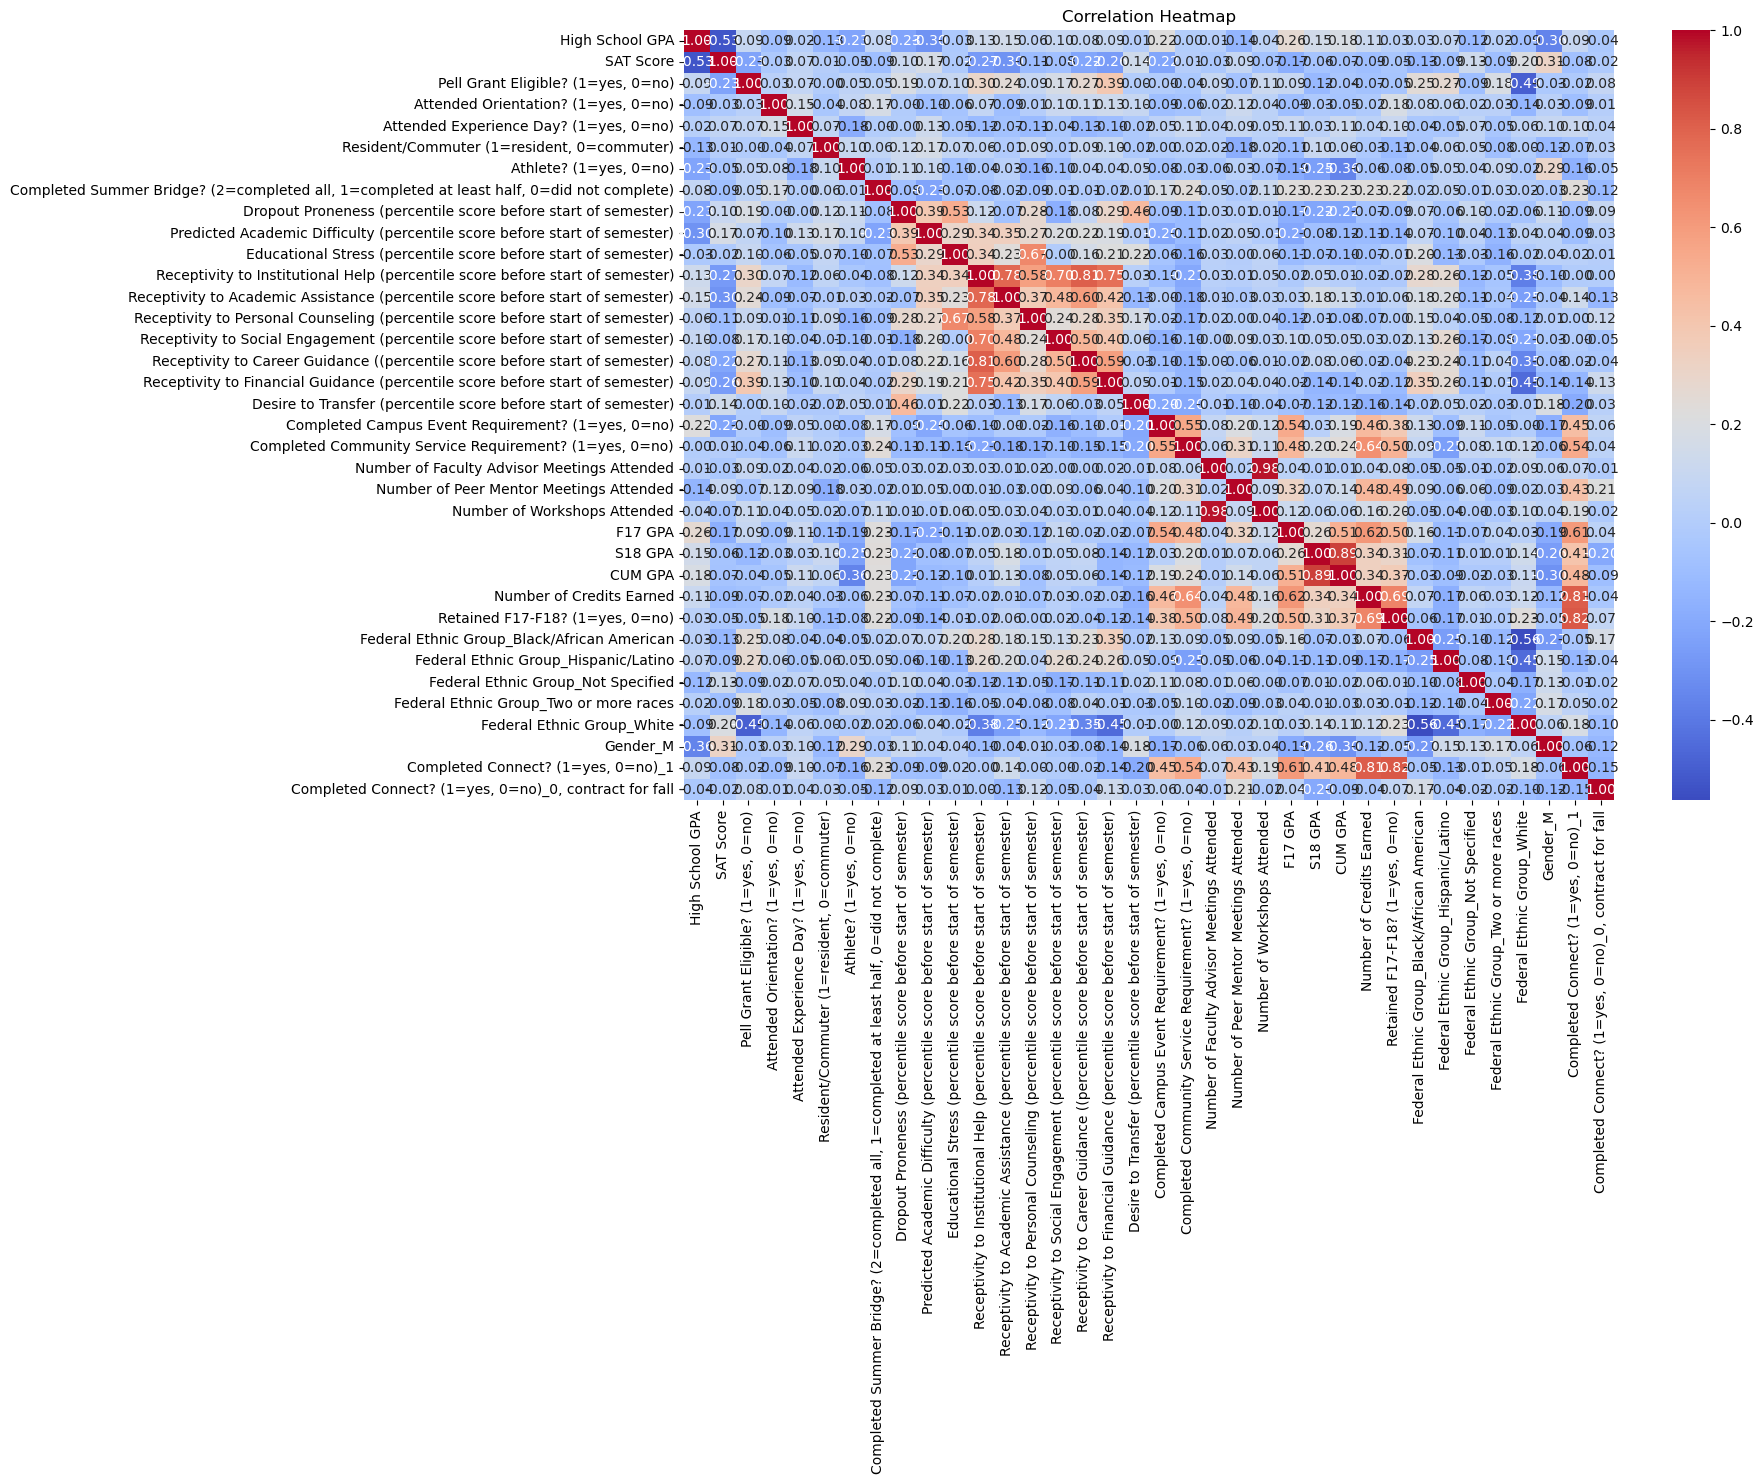

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7.1: Correlation Heatmap for Numeric Features
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")

# Save the figure as an image
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


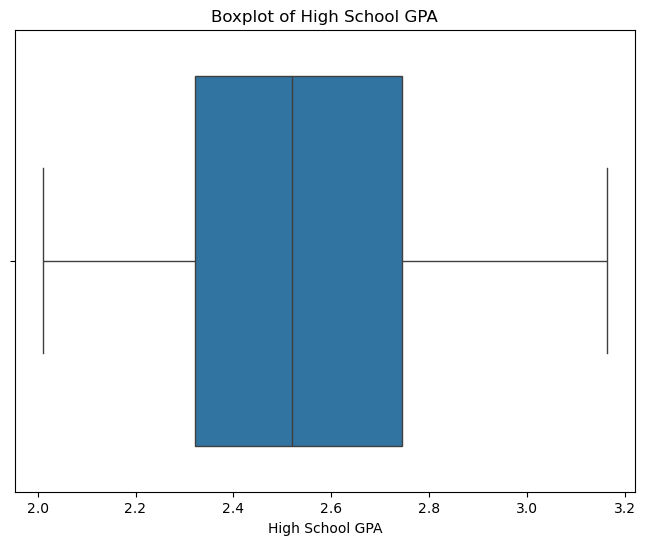

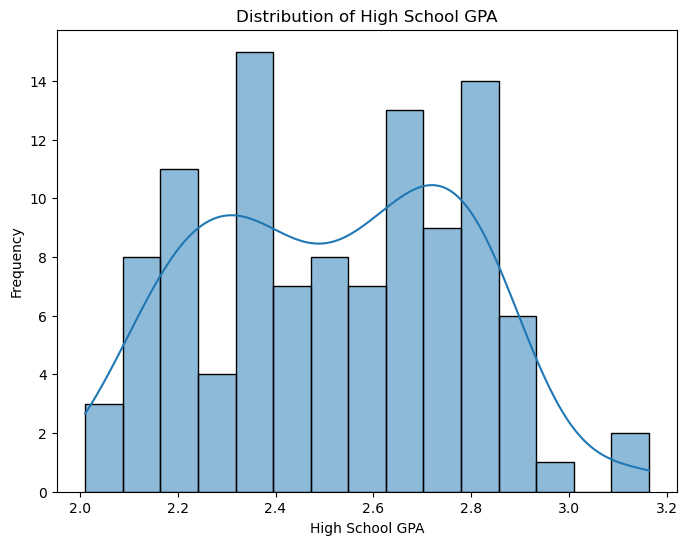

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7.2.1: Boxplot for High School GPA
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_encoded, x='High School GPA')
plt.title("Boxplot of High School GPA")
plt.xlabel("High School GPA")
plt.savefig("high_school_gpa_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

# Step 7.2.2: Histogram for High School GPA
plt.figure(figsize=(8, 6))
sns.histplot(data=data_encoded, x='High School GPA', kde=True, bins=15)
plt.title("Distribution of High School GPA")
plt.xlabel("High School GPA")
plt.ylabel("Frequency")
plt.savefig("high_school_gpa_histogram.png", dpi=300, bbox_inches='tight')
plt.show()


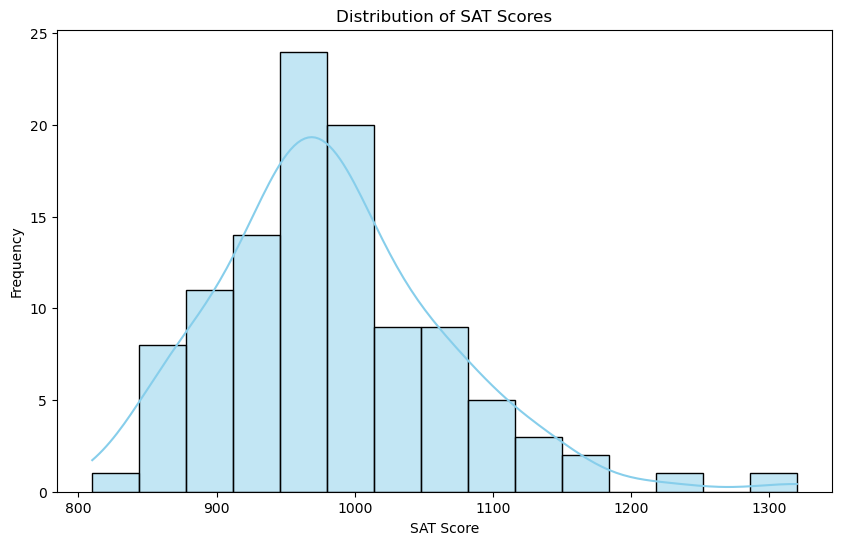

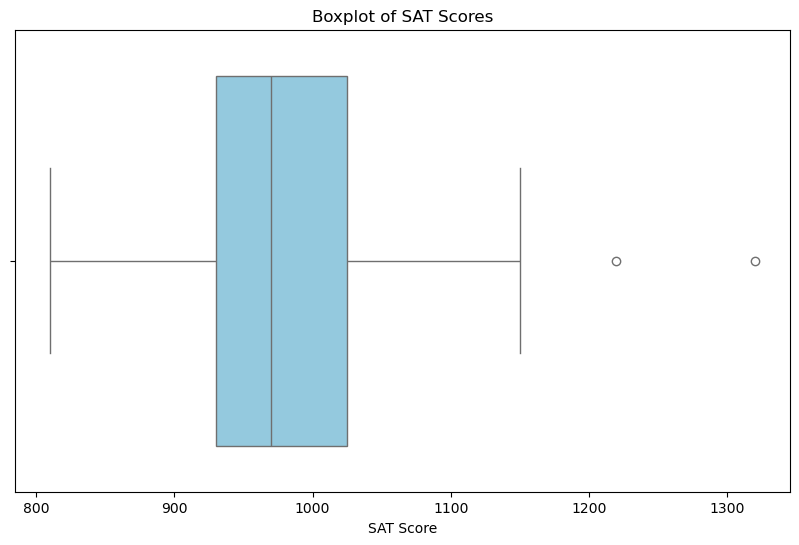

In [21]:
# Step 7.4.1: Distribution of SAT Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['SAT Score'], kde=True, color='skyblue', bins=15)
plt.title('Distribution of SAT Scores')
plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.savefig('sat_scores_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 7.4.2: Boxplot of SAT Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SAT Score'], color='skyblue')
plt.title('Boxplot of SAT Scores')
plt.xlabel('SAT Score')
plt.savefig('sat_scores_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


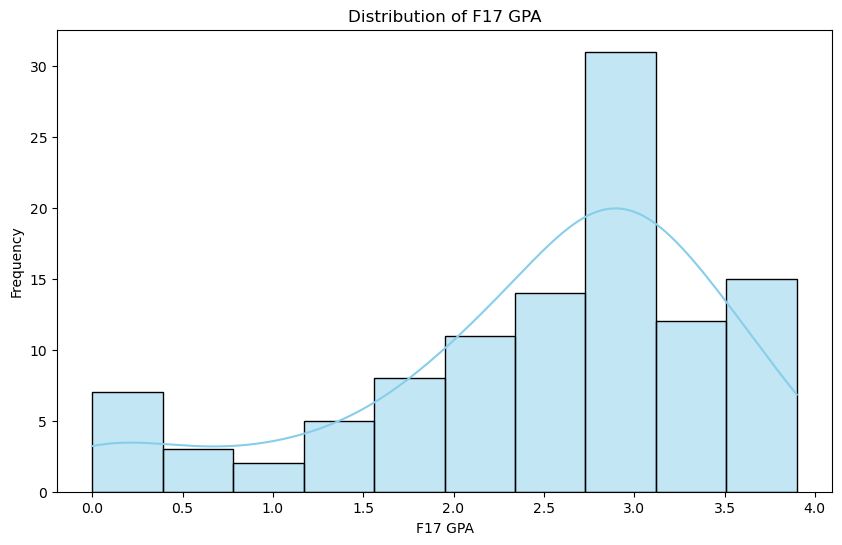

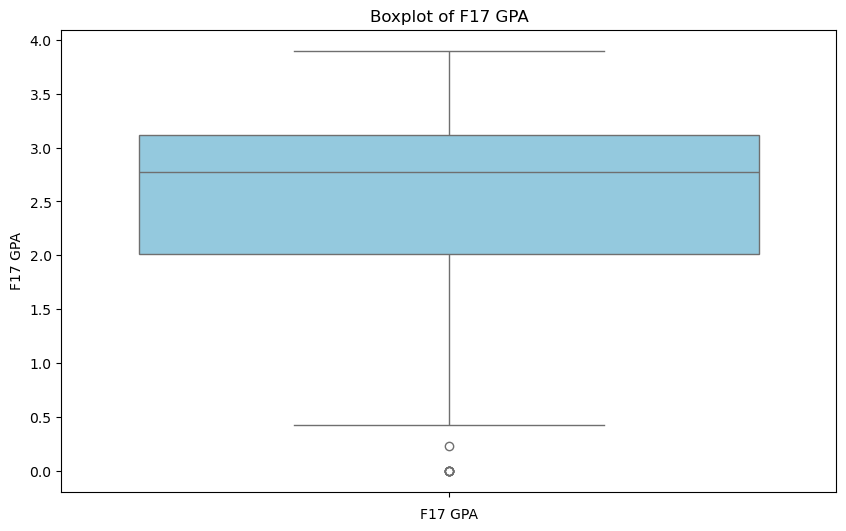

In [23]:
# Step 7.4.1: Histogram with KDE for F17 GPA
plt.figure(figsize=(10, 6))
sns.histplot(data['F17 GPA'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of F17 GPA')
plt.xlabel('F17 GPA')
plt.ylabel('Frequency')
plt.savefig('f17_gpa_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 7.4.2: Boxplot for F17 GPA
plt.figure(figsize=(10, 6))
sns.boxplot(data['F17 GPA'], color='skyblue')
plt.title('Boxplot of F17 GPA')
plt.xlabel('F17 GPA')
plt.savefig('f17_gpa_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


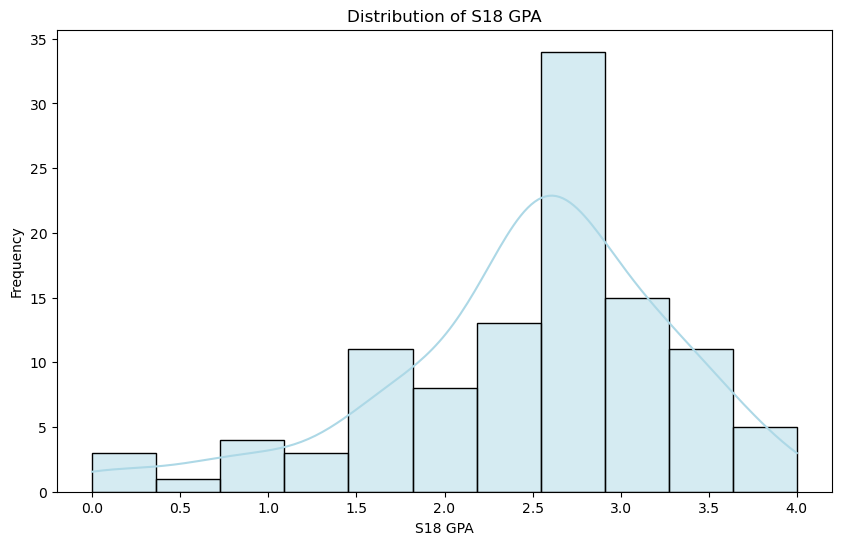

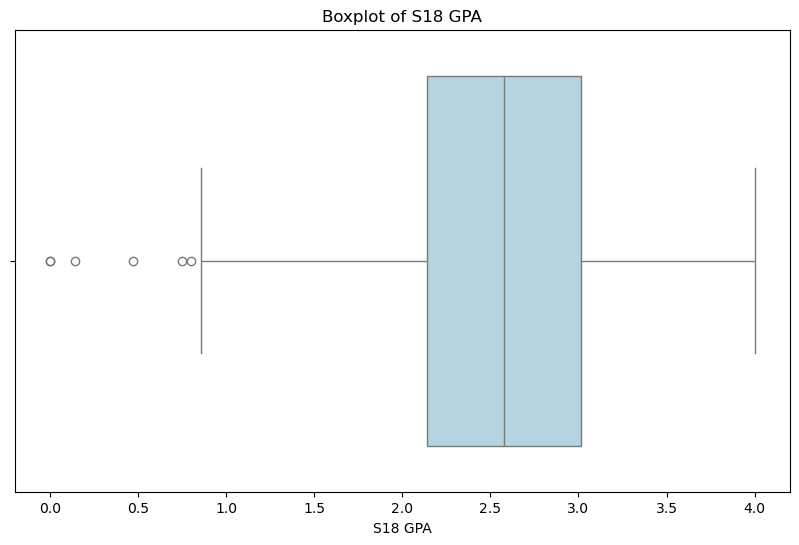

In [25]:
# Step 7.4.1: Histogram of S18 GPA
plt.figure(figsize=(10, 6))
sns.histplot(data['S18 GPA'], kde=True, color='lightblue')
plt.title('Distribution of S18 GPA')
plt.xlabel('S18 GPA')
plt.ylabel('Frequency')
plt.savefig('s18_gpa_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 7.4.2: Boxplot of S18 GPA
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['S18 GPA'], color='lightblue')
plt.title('Boxplot of S18 GPA')
plt.xlabel('S18 GPA')
plt.savefig('s18_gpa_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [27]:
# Step 1: Calculate correlations with the target variable
target_corr = data_encoded.corr()['Retained F17-F18? (1=yes, 0=no)'].sort_values(ascending=False)

# Display the correlations
print("Correlation of Features with the Target Variable (Retained F17-F18?):")
print(target_corr)


Correlation of Features with the Target Variable (Retained F17-F18?):
Retained F17-F18? (1=yes, 0=no)                                                              1.000000
Completed Connect? (1=yes, 0=no)_1                                                           0.823245
Number of Credits Earned                                                                     0.686372
F17 GPA                                                                                      0.504121
Completed Community Service Requirement? (1=yes, 0=no)                                       0.501714
Number of Peer Mentor Meetings Attended                                                      0.492449
Completed Campus Event Requirement? (1=yes, 0=no)                                            0.384141
CUM GPA                                                                                      0.370988
S18 GPA                                                                                      0.307344
Federal Ethn

In [29]:
# Step 1: Drop irrelevant features
features_to_drop = [
    'Federal Ethnic Group_Not Specified', 
    'Receptivity to Personal Counseling (percentile score before start of semester)',
    'Educational Stress (percentile score before start of semester)',
    'Receptivity to Institutional Help (percentile score before start of semester)',
    'Receptivity to Career Guidance ((percentile score before start of semester)',
    'Gender_M',
    'SAT Score',
    'Pell Grant Eligible? (1=yes, 0=no)',
    'Federal Ethnic Group_Black/African American',
    'Athlete? (1=yes, 0=no)',
    'Dropout Proneness (percentile score before start of semester)',
    'Resident/Commuter (1=resident, 0=commuter)',
    'Receptivity to Financial Guidance (percentile score before start of semester)',
    'Predicted Academic Difficulty (percentile score before start of semester)',
    'Desire to Transfer (percentile score before start of semester)',
    'Federal Ethnic Group_Hispanic/Latino',
    'Federal Ethnic Group_Two or more races',
    'Receptivity to Social Engagement (percentile score before start of semester)'
]

data_encoded.drop(columns=features_to_drop, inplace=True)

# Display the first few rows of the updated dataset
print("\nDataset after dropping irrelevant features:")
print(data_encoded.head())



Dataset after dropping irrelevant features:
   High School GPA  Attended Orientation? (1=yes, 0=no)  \
0            2.595                                  1.0   
1            2.637                                  1.0   
2            2.803                                  1.0   
3            2.354                                  1.0   
4            2.850                                  1.0   

   Attended Experience Day? (1=yes, 0=no)  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   

   Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)  \
0                                                2.0                                           
1                                                2.0                                           
2                                        

In [31]:
# Step 1: Separate features and target
X = data_encoded.drop(columns=['Retained F17-F18? (1=yes, 0=no)'])
y = data_encoded['Retained F17-F18? (1=yes, 0=no)']


In [33]:
from sklearn.model_selection import train_test_split

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler

# Step 3: Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 4: Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Step 6: Evaluate model performance
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy on Test Set: 1.0

Confusion Matrix:
 [[ 7  0]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



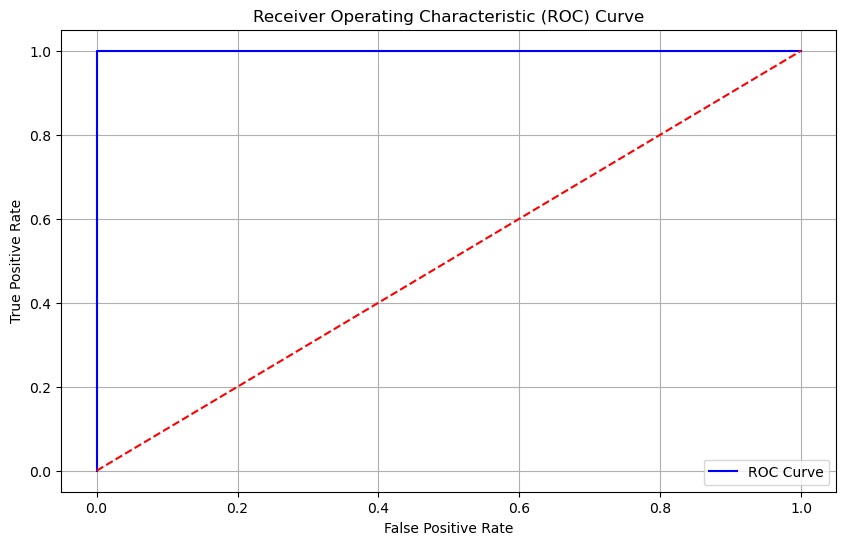

Area Under Curve (AUC): 1.00


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 7: Plotting the ROC Curve
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the AUC
auc = roc_auc_score(y_test, y_probs)
print(f'Area Under Curve (AUC): {auc:.2f}')


In [41]:
from sklearn.model_selection import cross_val_score

# Step: Cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.83333333 0.94117647 0.94117647 1.         0.82352941]
Mean Cross-Validation Score: 0.907843137254902


In [43]:
from sklearn.model_selection import GridSearchCV

# Step: Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


Best Hyperparameters: {'C': 0.1}
Best Cross-Validation Score: 0.907843137254902


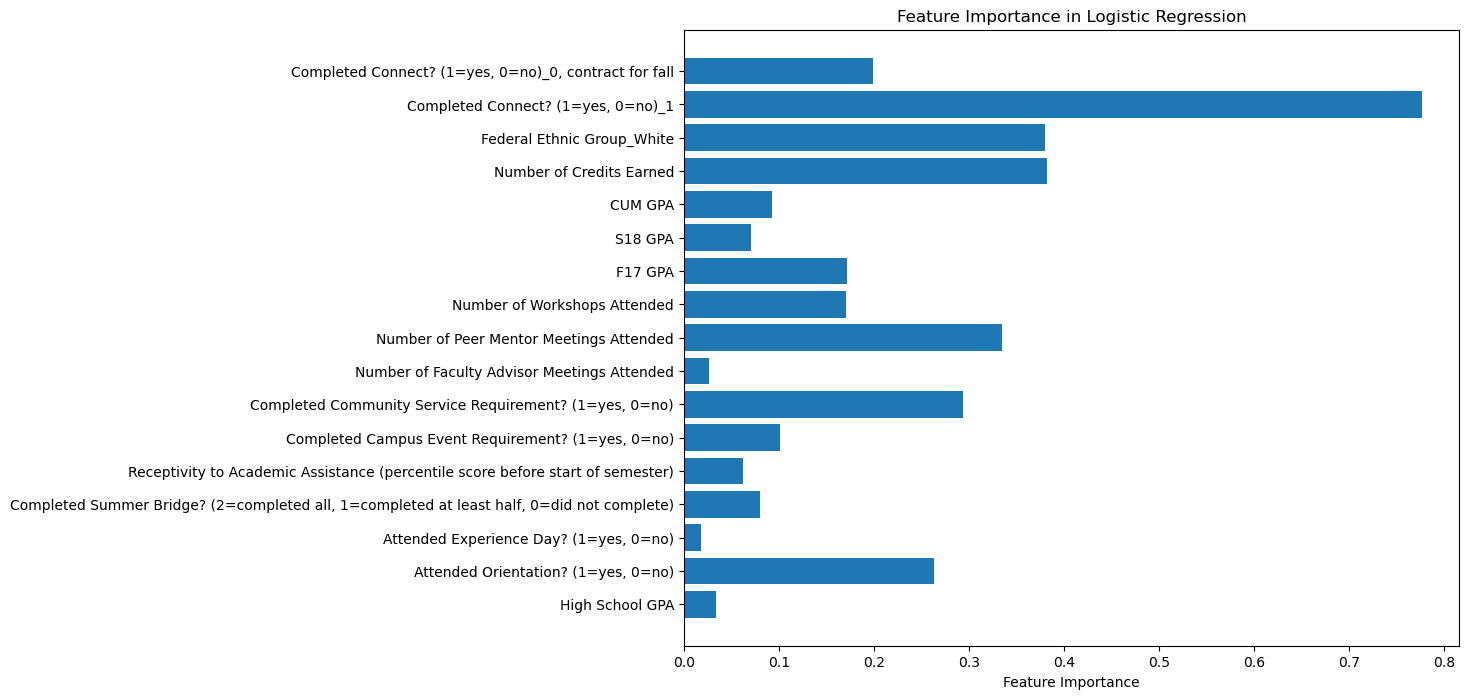

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing feature importance for Logistic Regression
feature_importance = np.abs(grid_search.best_estimator_.coef_).flatten()
features = X_train.columns

plt.figure(figsize=(10, 8))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [49]:
# Print column names of X_train to verify feature names
print(X_train.columns)


Index(['High School GPA', 'Attended Orientation? (1=yes, 0=no)',
       'Attended Experience Day? (1=yes, 0=no)',
       'Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)',
       'Receptivity to Academic Assistance (percentile score before start of semester)',
       'Completed Campus Event Requirement? (1=yes, 0=no)',
       'Completed Community Service Requirement? (1=yes, 0=no)',
       'Number of Faculty Advisor Meetings Attended',
       'Number of Peer Mentor Meetings Attended',
       'Number of Workshops Attended', 'F17 GPA', 'S18 GPA', 'CUM GPA',
       'Number of Credits Earned', 'Federal Ethnic Group_White',
       'Completed Connect? (1=yes, 0=no)_1',
       'Completed Connect? (1=yes, 0=no)_0, contract for fall'],
      dtype='object')


In [51]:
# Drop the irrelevant or low-importance features
features_to_drop = ['High School GPA', 'Attended Orientation? (1=yes, 0=no)', 
                    'Attended Experience Day? (1=yes, 0=no)', 
                    'Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)',
                    'Receptivity to Academic Assistance (percentile score before start of semester)',
                    'Completed Campus Event Requirement? (1=yes, 0=no)',
                    'Number of Faculty Advisor Meetings Attended',
                    'Number of Peer Mentor Meetings Attended',
                    'Number of Workshops Attended', 'S18 GPA',
                    'Federal Ethnic Group_White', 'Completed Connect? (1=yes, 0=no)_0, contract for fall']

# Apply the drop to both training and test sets
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Confirm the new set of columns after dropping
print(X_train_reduced.columns)


Index(['Completed Community Service Requirement? (1=yes, 0=no)', 'F17 GPA',
       'CUM GPA', 'Number of Credits Earned',
       'Completed Connect? (1=yes, 0=no)_1'],
      dtype='object')


In [53]:
# Retrain Logistic Regression Model
log_reg_reduced = LogisticRegression(random_state=42)
log_reg_reduced.fit(X_train_reduced, y_train)

# Step 2: Make predictions on the test set
y_pred_reduced = log_reg_reduced.predict(X_test_reduced)

# Step 3: Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_reduced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_reduced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_reduced))


Accuracy on Test Set: 0.9545454545454546

Confusion Matrix:
 [[ 6  1]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.94      1.00      0.97        15

    accuracy                           0.95        22
   macro avg       0.97      0.93      0.95        22
weighted avg       0.96      0.95      0.95        22



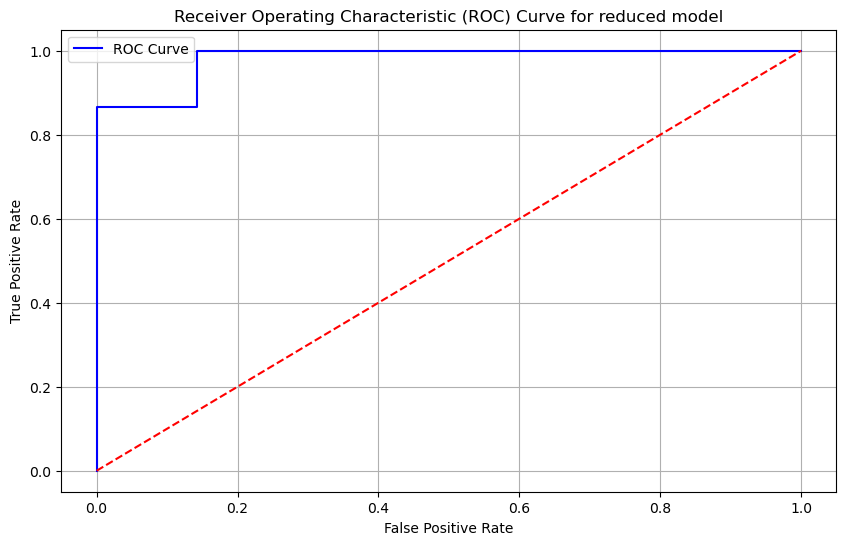

Area Under Curve (AUC): 0.98


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_probs_reduced = log_reg_reduced.predict_proba(X_test_reduced)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_reduced)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for reduced model')
plt.legend()
plt.grid()
plt.savefig('roc_curve_reduced.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the AUC
auc_reduced = roc_auc_score(y_test, y_probs_reduced)
print(f'Area Under Curve (AUC): {auc_reduced:.2f}')
